## Time Series Project

1. Explore the electricity dataset, using tools like line charts and decomposition
2. Forecast the first three days of February 2017 (72 hours) of electricity consumption for column `PowerConsumption_Zone1`, using the entire month of January 2017 to train your Model.
3. Fit both a Linear Regression model and Facebook Prophet. Compare their accuracy using plots of predicted vs. actual, as well as metrics like MAE and MAPE


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import scipy.stats as stats

In [3]:
electricity = pd.read_csv("/Users/huzaifamalik/Downloads/Python for Data Science/Regression/Course Materials/Data/powerconsumption.csv")

In [4]:
electricity.shape

(52416, 9)

In [5]:
electricity.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [6]:
electricity["Datetime"] = pd.to_datetime(electricity["Datetime"])

In [7]:
print(electricity["Datetime"].dt.year.min())
print(electricity["Datetime"].dt.year.max())

2017
2017


In [8]:
electricity.sort_values("Datetime", ascending=True, inplace = True)

In [9]:
electricity.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [10]:
#First see if there are any missing values in the dataset

electricity.loc[electricity.isna().any(axis = 1)]
#No missing values found as per below

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3


In [11]:
#Next check if Datetime column has any duplicates

electricity.loc[electricity["Datetime"].duplicated()]
#No missing values found as per below

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3


In [12]:
electricity_hourly = electricity.set_index("Datetime").resample("h").mean()

In [13]:
electricity_hourly_zone_1 = electricity_hourly.iloc[:, 0:6].copy()

In [14]:
electricity_hourly_zone_1["Difference"] = electricity_hourly_zone_1["PowerConsumption_Zone1"].diff()

In [15]:
electricity_hourly_zone_1.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,Difference
Datetime,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,NaN
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,-4540.759493
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,-2574.177217
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,-1271.898733
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,-335.189873


In [21]:
electricity_hourly_jan_zone_1 = (
    electricity_hourly_zone_1.reset_index().loc[
        electricity_hourly_zone_1.reset_index()["Datetime"].dt.month == 1
    ]
)

In [22]:
electricity_hourly_jan_zone_1["Trend"] = electricity_hourly_jan_zone_1.index + 1

In [23]:
electricity_hourly_jan_zone_1["Hour"] = electricity_hourly_jan_zone_1["Datetime"].dt.hour.astype("str")

In [24]:
electricity_hourly_jan_zone_1.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,Difference,Trend,Hour
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,NaN,1,0
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,-4540.759493,2,1
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,-2574.177217,3,2
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,-1271.898733,4,3
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,-335.189873,5,4


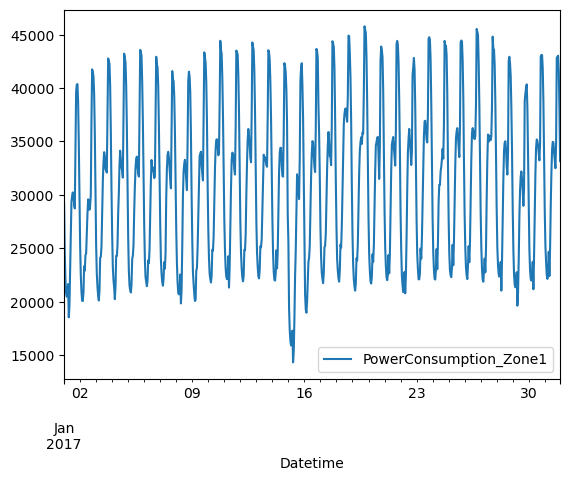

In [102]:
#Hourly chart plotted for avg hourly electrical consumption in Zone 1 in Jan
electricity_hourly_jan_zone_1.reset_index().plot(x = "Datetime", y = "PowerConsumption_Zone1");

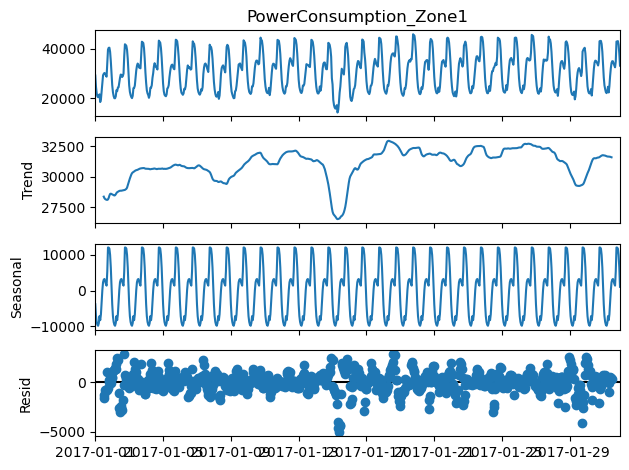

In [108]:
#Decomposition chart for January electricity usage
seasonal_decompose(electricity_hourly_jan_zone_1.set_index("Datetime")["PowerConsumption_Zone1"]).plot();

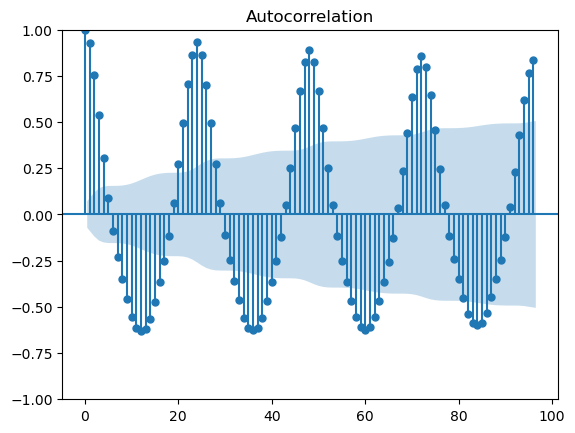

In [110]:
plot_acf(electricity_hourly_jan_zone_1["PowerConsumption_Zone1"], lags = 96);

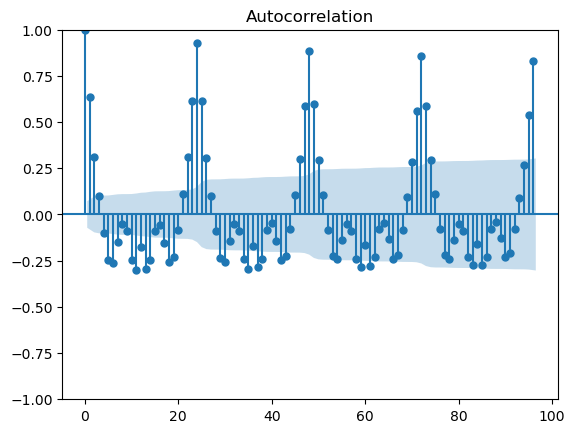

In [112]:
plot_acf(electricity_hourly_jan_zone_1["Difference"].dropna(), lags = 96);

In [113]:
jan_hourly_train_data = pd.get_dummies(
    electricity_hourly_jan_zone_1.loc[:, ["Datetime", "PowerConsumption_Zone1", "Trend", "Hour"]], 
    dtype=int,
    drop_first=True
).set_index("Datetime")

In [114]:
jan_hourly_train_data.head()

,PowerConsumption_Zone1,Trend,Hour_1,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,29197.974683,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 01:00:00,24657.215190,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 02:00:00,22083.037973,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 03:00:00,20811.139240,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-01-01 04:00:00,20475.949367,5,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
feb_first_72_hrs = (
    electricity_hourly_zone_1.reset_index().loc[
        (electricity_hourly_zone_1.reset_index()["Datetime"].dt.date >= pd.to_datetime("2017-02-01").date()) & 
        (electricity_hourly_zone_1.reset_index()["Datetime"].dt.date <= pd.to_datetime("2017-02-03").date())
    ]
)
#.reset_index().drop(columns = "index")

In [116]:
feb_first_72_hrs["Trend"] = feb_first_72_hrs.index + 1

In [117]:
feb_first_72_hrs["Hour"] = feb_first_72_hrs["Datetime"].dt.hour.astype("str")

In [118]:
feb_first_72_hrs.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,Difference,Trend,Hour
744,2017-02-01 00:00:00,11.430000,67.445000,4.920667,0.050667,0.104000,28172.542372,-4985.938638,745,0
745,2017-02-01 01:00:00,11.506667,64.848333,4.919500,0.058667,0.116167,25288.474577,-2884.067795,746,1
746,2017-02-01 02:00:00,11.118333,62.490000,4.920500,0.070333,0.132333,23351.186440,-1937.288137,747,2
747,2017-02-01 03:00:00,10.815000,61.971667,4.920333,0.065333,0.119167,22359.661017,-991.525423,748,3
748,2017-02-01 04:00:00,10.613333,61.400000,4.921667,0.056167,0.118833,22213.220338,-146.440678,749,4


In [119]:
feb_hourly_test_data = pd.get_dummies(
    feb_first_72_hrs.loc[:, ["Datetime", "PowerConsumption_Zone1", "Trend", "Hour"]], 
    dtype=int,
    drop_first=True
).set_index("Datetime")

In [120]:
feb_hourly_test_data.head()

,PowerConsumption_Zone1,Trend,Hour_1,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-02-01 00:00:00,28172.542372,745,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 01:00:00,25288.474577,746,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 02:00:00,23351.186440,747,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02-01 03:00:00,22359.661017,748,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-02-01 04:00:00,22213.220338,749,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
X_train = sm.add_constant(jan_hourly_train_data.iloc[:,1:])
y_train = jan_hourly_train_data["PowerConsumption_Zone1"]

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.951
Model:                                OLS   Adj. R-squared:                  0.949
Method:                     Least Squares   F-statistic:                     577.4
Date:                    Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                            18:11:14   Log-Likelihood:                -6558.4
No. Observations:                     744   AIC:                         1.317e+04
Df Residuals:                         719   BIC:                         1.328e+04
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.633e+04    314.789     83.654      0.000    2.57e+04     2.7e+04
Trend          2.7642      0.283      9.763      0.000       2.208       3.320
Hour_1     -3371.1268    421.061     -8.006      0.000   -4197.783   -2544.471
Hour_10     3722.1664    421.070      8.840      0.000    2895.492    4548.841
Hour_11     5958.7162    421.072     14.151      0.000    5132.038    6785.394
Hour_12     6754.9721    421.075     16.042      0.000    5928.290    7581.655
Hour_13     6920.6359    421.077     16.436      0.000    6093.949    7747.323
Hour_14     6197.7084    421.079     14.719      0.000    5371.016    7024.401
Hour_15     5565.0054    421.082     13.216      0.000    4738.308    6391.703
Hour_16     5048.1049    421.085     11.988      0.000    4221.401    5874.808
Hour_17     8939.2729    421.088     21.229      0.000    8112.563    9765.983
Hour_18      1.57e+04    421.092     37.293      0.000    1.49e+04    1.65e+04
Hour_19     1.567e+04    421.095     37.206      0.000    1.48e+04    1.65e+04
Hour_2     -5008.9746    421.061    -11.896      0.000   -5835.631   -4182.318
Hour_20     1.541e+04    421.099     36.587      0.000    1.46e+04    1.62e+04
Hour_21     1.365e+04    421.103     32.405      0.000    1.28e+04    1.45e+04
Hour_22     1.012e+04    421.107     24.041      0.000    9297.105     1.1e+04
Hour_23     4757.7226    421.111     11.298      0.000    3930.968    5584.477
Hour_3     -5816.3121    421.062    -13.813      0.000   -6642.969   -4989.655
Hour_4     -6086.6794    421.062    -14.456      0.000   -6913.338   -5260.021
Hour_5     -5378.3288    421.063    -12.773      0.000   -6204.989   -4551.669
Hour_6     -3451.3910    421.064     -8.197      0.000   -4278.053   -2624.729
Hour_7     -4639.4880    421.065    -11.018      0.000   -5466.153   -3812.823
Hour_8     -3015.4331    421.067     -7.161      0.000   -3842.101   -2188.765
Hour_9       422.0968    421.069      1.002      0.316    -404.574    1248.768
==============================================================================
Omnibus:                      300.491   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.209
Skew:                          -1.762   Prob(JB):                         0.00
Kurtosis:                       9.254   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

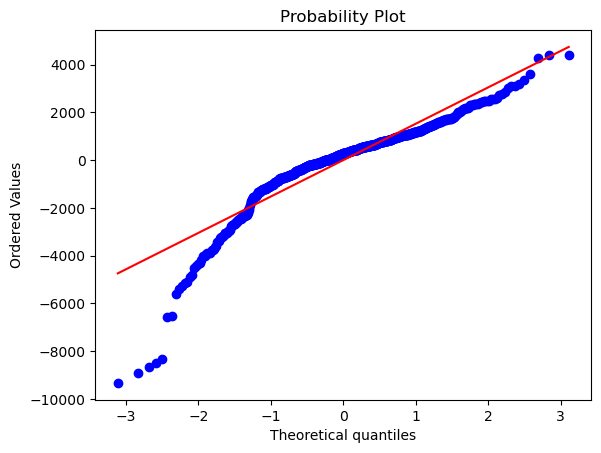

In [122]:
stats.probplot(model.resid, dist = "norm", plot = plt);

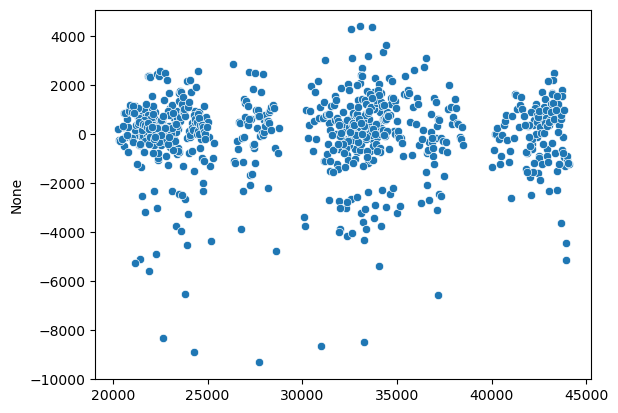

In [123]:
sns.scatterplot(x = model.predict(), y = model.resid);

In [124]:
X_test = sm.add_constant(feb_hourly_test_data.iloc[:,1:])
y_test = feb_hourly_test_data["PowerConsumption_Zone1"]

y_predicted = model.predict(X_test)

print(mae(y_test, y_predicted))
print(mape(y_test, y_predicted))

1016.8138495941524
0.03272545074533649


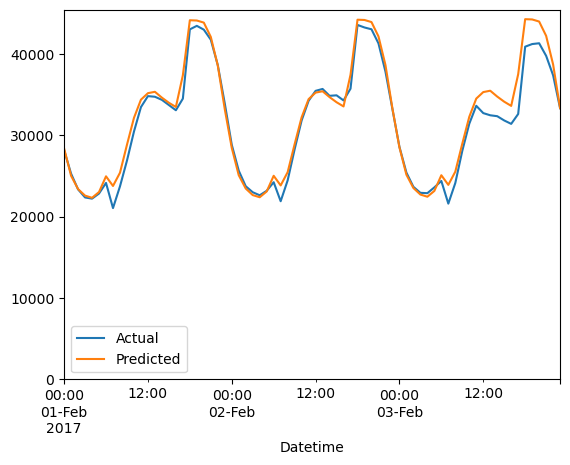

In [125]:
pd.DataFrame(
    {
        "Actual": y_test,
        "Predicted": y_predicted
    }
).plot(ylim = 0);

## Facebook prophet

In [126]:
from prophet import Prophet

In [127]:
facebook_jan_hourly_train = electricity_hourly_jan_zone_1.loc[:, ["Datetime", "PowerConsumption_Zone1"]]

In [128]:
facebook_jan_hourly_train.rename(columns = {"Datetime": "ds", "PowerConsumption_Zone1": "y"}, inplace=True)

In [129]:
facebook_jan_hourly_train.head()

,ds,y
0,2017-01-01 00:00:00,29197.974683
1,2017-01-01 01:00:00,24657.215190
2,2017-01-01 02:00:00,22083.037973
3,2017-01-01 03:00:00,20811.139240
4,2017-01-01 04:00:00,20475.949367


In [138]:
facebook_model = Prophet()
facebook_model.fit(facebook_jan_hourly_train)

18:18:55 - cmdstanpy - INFO - Chain [1] start processing
18:18:56 - cmdstanpy - INFO - Chain [1] done processing


In [139]:
future = facebook_model.make_future_dataframe(periods = 72, freq = "h")

forecast = facebook_model.predict(future)

In [140]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
811,2017-02-03 19:00:00,30906.381207,42283.567186,45911.457057,30781.773480,31021.298499,13106.102549,13106.102549,13106.102549,12470.177120,12470.177120,12470.177120,635.925429,635.925429,635.925429,0.0,0.0,0.0,44012.483756
812,2017-02-03 20:00:00,30901.847682,42117.386641,45896.934663,30774.512821,31020.586941,13133.521672,13133.521672,13133.521672,12503.614648,12503.614648,12503.614648,629.907024,629.907024,629.907024,0.0,0.0,0.0,44035.369354
813,2017-02-03 21:00:00,30897.314156,39817.663948,43392.030310,30768.075997,31019.398680,10625.820168,10625.820168,10625.820168,10006.323509,10006.323509,10006.323509,619.496659,619.496659,619.496659,0.0,0.0,0.0,41523.134324
814,2017-02-03 22:00:00,30892.780631,35290.264730,39146.958361,30760.345706,31019.131062,6420.475069,6420.475069,6420.475069,5816.182254,5816.182254,5816.182254,604.292815,604.292815,604.292815,0.0,0.0,0.0,37313.255700
815,2017-02-03 23:00:00,30888.247105,30714.135037,34367.426342,30754.007406,31019.176856,1621.720120,1621.720120,1621.720120,1037.785707,1037.785707,1037.785707,583.934413,583.934413,583.934413,0.0,0.0,0.0,32509.967225


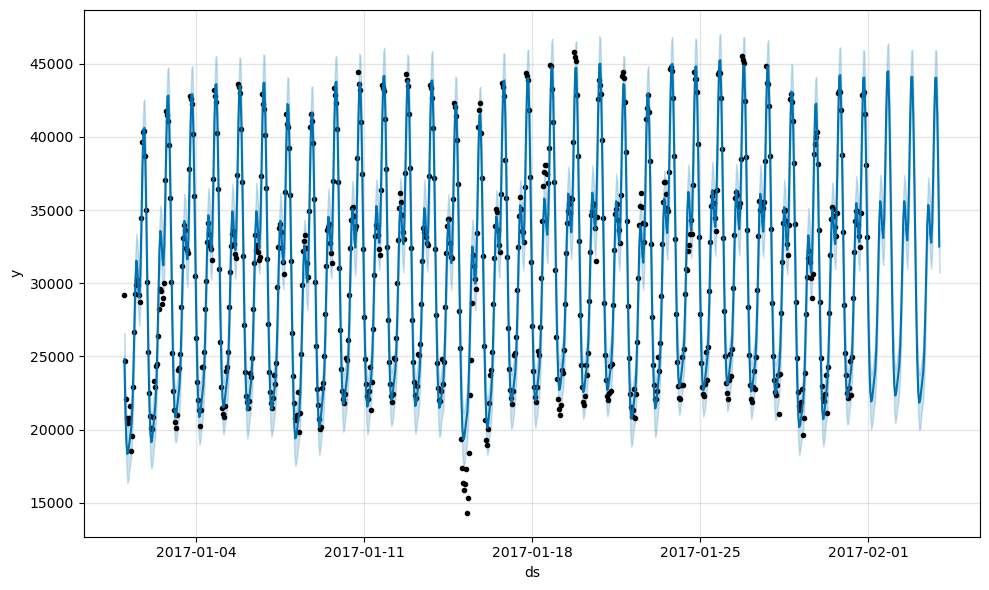

In [141]:
facebook_model.plot(forecast);

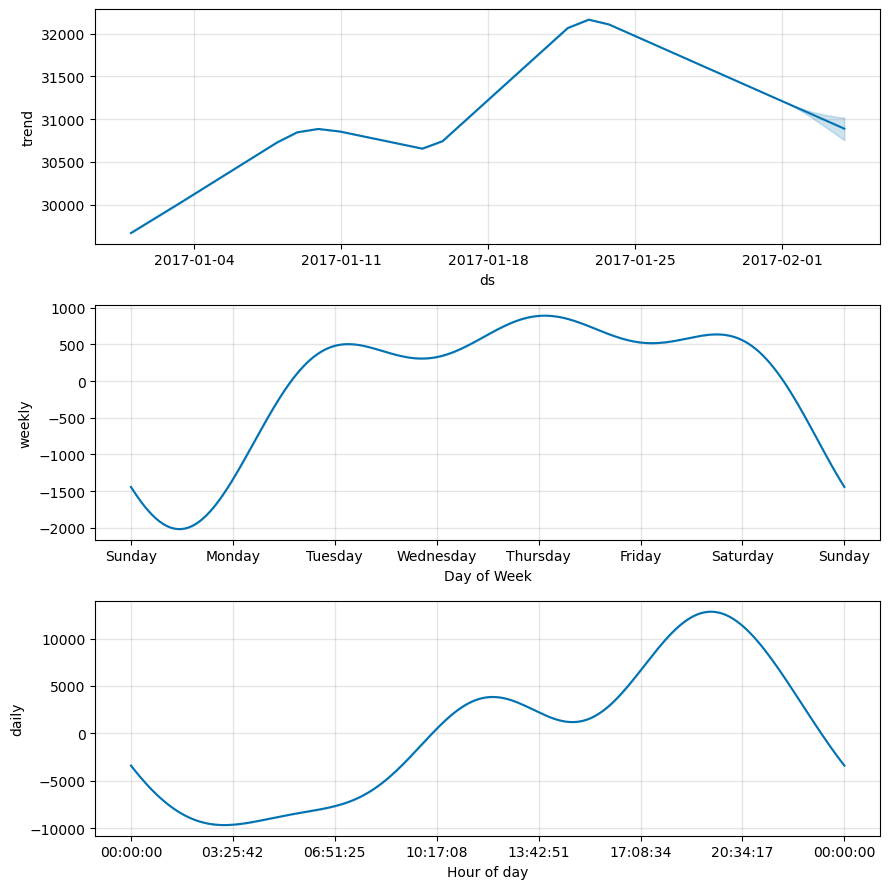

In [147]:
facebook_model.plot_components(forecast);

In [143]:
facebook_test_predictions = (
    forecast.loc[
        (forecast["ds"].dt.date >= pd.to_datetime("2017-02-01").date()) & (forecast["ds"].dt.date <= pd.to_datetime("2017-02-03").date())
        ]
        .loc[:, ["ds", "yhat"]].rename(columns = {"ds": "Date", "yhat": "Predictions"})
        .set_index("Date")
)

In [144]:
facebook_test_predictions

,Predictions
Date,
2017-02-01 00:00:00,28144.098605
2017-02-01 01:00:00,24711.526793
2017-02-01 02:00:00,22633.079248
2017-02-01 03:00:00,21923.243081
2017-02-01 04:00:00,22195.688440
...,...
2017-02-03 19:00:00,44012.483756
2017-02-03 20:00:00,44035.369354
2017-02-03 21:00:00,41523.134324


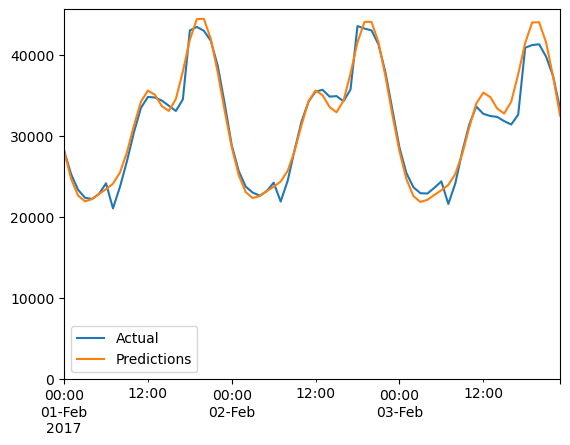

In [145]:
pd.DataFrame(
    {
        "Actual": y_test,
        "Predictions": facebook_test_predictions["Predictions"]
    }
).plot(ylim = 0);

In [146]:
print(mae(y_test, facebook_test_predictions))
print(mape(y_test, facebook_test_predictions))

1048.3441695660201
0.03447105240091383
